***Data Loading & Pre-Processing:***

In [ ]:
import pandas as pd

df_wed = pd.read_csv("/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv")

print("Wednesday shape:", df_wed.shape)


Wednesday shape: (692703, 79)


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_wed.dtypes

,0
Destination Port,int64
Flow Duration,int64
Total Fwd Packets,int64
Total Backward Packets,int64
Total Length of Fwd Packets,int64
Total Length of Bwd Packets,int64
Fwd Packet Length Max,int64
Fwd Packet Length Min,int64
Fwd Packet Length Mean,float64
Fwd Packet Length Std,float64


In [ ]:
df_wed[' Label'].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

In [ ]:
# Missing Values
df_wed.isnull().sum()

,0
Destination Port,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Total Length of Fwd Packets,0
Total Length of Bwd Packets,0
Fwd Packet Length Max,0
Fwd Packet Length Min,0
Fwd Packet Length Mean,0
Fwd Packet Length Std,0


In [ ]:
df_wed['Flow Bytes/s'] = df_wed['Flow Bytes/s'].fillna(0)

In [ ]:
# Summary Statistics (mean, std, min, max)
df_wed.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,692703.000000,692703.0,692703.0,692703.0,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,692703.0,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,692703.0,692703.0,692703.0,692703.0,692703.0,692703.0,692703.000000,6.927030e+05,692703.000000,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,5686.869462,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,1661.546313,33.832924,551.940841,658.636320,inf,inf,2.502809e+06,6.844318e+06,2.289307e+07,2.224592e+05,2.774476e+07,5.069287e+06,9.016685e+06,2.279837e+07,1.030778e+06,1.386407e+07,2.647068e+06,3.522882e+06,9.305284e+06,9.268549e+05,0.042201,0.0,0.0,0.0,2.420580e+02,2.492460e+02,9.545305e+04,4.052544e+03,13.723771,1725.129073,278.246605,523.265612,8.876018e+05,0.097301,0.042201,0.000338,0.193693,0.418049,0.066372,0.0,0.000339,0.556957,305.664882,60.555440,551.940841,2.420580e+02,0.0,0.0,0.0,0.0,0.0,0.0,9.556261,5.550930e+02,10.214079,1.699489e+04,5299.671256,1476.643078,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,15727.423560,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,2613.924428,64.586498,797.449564,1098.043102,NaN,NaN,5.595945e+06,1.175401e+07,3.839395e+07,3.673248e+06,4.277094e+07,1.103613e+07,1.600574e+07,3.843629e+07,8.866760e+06,3.335293e+07,9.593760e+06,1.073828e+07,2.616633e+07,8.107914e+06,0.201048,0.0,0.0,0.0,1.564277e+04,1.968957e+04,3.198607e+05,3.091927e+04,27.521716,2634.372188,369.130494,783.442461,1.748895e+06,0.296368,0.201048,0.018376,0.395192,0.493239,0.248931,0.0,0.018416,0.570734,398.045939,157.643794,797.449564,1.564277e+04,0.0,0.0,0.0,0.0,0.0,0.0,747.197814,6.163663e+03,984.204633,2.240953e+06,11869.737394,7315.272621,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,-1.000000e+00,1.000000,

In [ ]:
# Class Distribution (Label)
df_wed[' Label'].value_counts()

,count
Label,
BENIGN,440031
DoS Hulk,231073
DoS GoldenEye,10293
DoS slowloris,5796
DoS Slowhttptest,5499
Heartbleed,11


***Online Machine Learning (Classification):***

***Streaming with iterrows()***



*   It provides the records one by one, similar to real-time data.
*   The order of rows reflects the temporal sequence.
*   It uses very little memory since only a single record is processed at a time.



In [ ]:
!pip install river

In [ ]:
!pip install -U river

In [ ]:
import pandas as pd
from river.tree import HoeffdingTreeClassifier
from river import metrics

# Online Model
model = HoeffdingTreeClassifier()

# Online Accuracy Metric
metric = metrics.Accuracy()

print("Model initialized as:", model)


Model initialized as: HoeffdingTreeClassifier


In [ ]:


LABEL_COL = " Label"

numeric_cols = df_wed.select_dtypes(include=["int64","float64","int32","float32"]).columns.tolist()
feature_cols = [c for c in numeric_cols if c != LABEL_COL]


In [ ]:
accuracies = []

for i, (_, row) in enumerate(df_wed.iterrows()):

    xi = row[feature_cols].to_dict()
    yi = row[LABEL_COL]

    # Predict
    y_pred = model.predict_one(xi)

    if y_pred is not None:
        metric.update(yi, y_pred)
        accuracies.append(metric.get())
    else:
        accuracies.append(metric.get())


    model.learn_one(xi, yi)

    if (i+1) % 1000 == 0:
        print(f"Row {i+1} → Accuracy: {metric.get():.4f}")


Row 1000 → Accuracy: 1.0000
Row 2000 → Accuracy: 1.0000
Row 3000 → Accuracy: 1.0000
Row 4000 → Accuracy: 1.0000
Row 5000 → Accuracy: 1.0000
Row 6000 → Accuracy: 1.0000
Row 7000 → Accuracy: 0.9999
Row 8000 → Accuracy: 0.9999
Row 9000 → Accuracy: 0.9999
Row 10000 → Accuracy: 0.9999
Row 11000 → Accuracy: 0.9999
Row 12000 → Accuracy: 0.9999
Row 13000 → Accuracy: 0.9999
Row 14000 → Accuracy: 0.9999
Row 15000 → Accuracy: 0.9999
Row 16000 → Accuracy: 0.9999
Row 17000 → Accuracy: 0.9999
Row 18000 → Accuracy: 0.9999
Row 19000 → Accuracy: 0.9999
Row 20000 → Accuracy: 0.9999
Row 21000 → Accuracy: 1.0000
Row 22000 → Accuracy: 1.0000
Row 23000 → Accuracy: 1.0000
Row 24000 → Accuracy: 1.0000
Row 25000 → Accuracy: 1.0000
Row 26000 → Accuracy: 1.0000
Row 27000 → Accuracy: 0.9947
Row 28000 → Accuracy: 0.9945
Row 29000 → Accuracy: 0.9905
Row 30000 → Accuracy: 0.9859
Row 31000 → Accuracy: 0.9842
Row 32000 → Accuracy: 0.9837
Row 33000 → Accuracy: 0.9836
Row 34000 → Accuracy: 0.9827
Row 35000 → Accuracy: 0

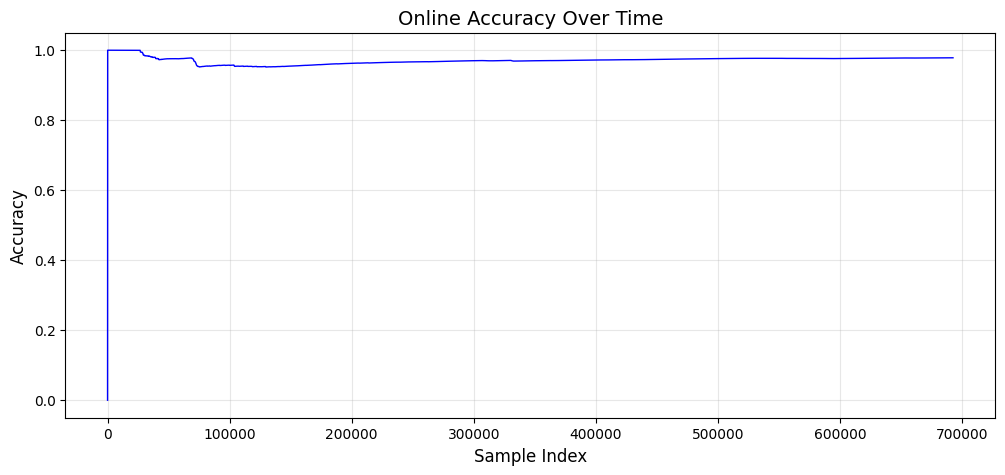

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(accuracies, linewidth=1, color='blue')
plt.title("Online Accuracy Over Time", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


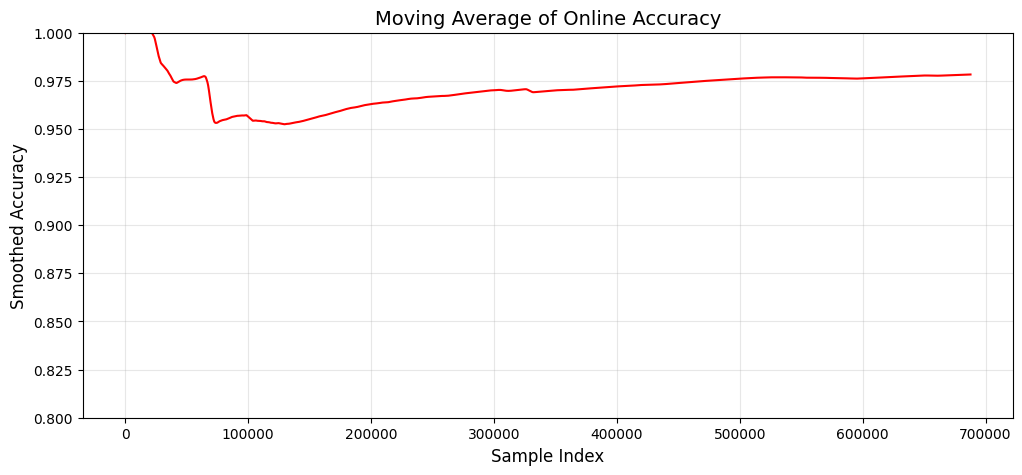

In [ ]:
import numpy as np

window = 5000
ma = np.convolve(accuracies, np.ones(window)/window, mode='valid')

plt.figure(figsize=(12,5))
plt.plot(ma, color='red')
plt.title("Moving Average of Online Accuracy", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Smoothed Accuracy", fontsize=12)

plt.ylim(0.8, 1.0)
plt.grid(alpha=0.3)
plt.show()


In [ ]:
from river import metrics

cm = metrics.ConfusionMatrix()

for i, (_, row) in enumerate(df_wed.iterrows()):

    xi = row[feature_cols].to_dict()
    yi = row[LABEL_COL]

    y_pred = model.predict_one(xi)


    if y_pred is not None:
        cm.update(yi, y_pred)


    model.learn_one(xi, yi)

    if (i+1) % 20000 == 0:
        print(f"Processed {i+1} rows...")


Processed 20000 rows...
Processed 40000 rows...
Processed 60000 rows...
Processed 80000 rows...
Processed 100000 rows...
Processed 120000 rows...
Processed 140000 rows...
Processed 160000 rows...
Processed 180000 rows...
Processed 200000 rows...
Processed 220000 rows...
Processed 240000 rows...
Processed 260000 rows...
Processed 280000 rows...
Processed 300000 rows...
Processed 320000 rows...
Processed 340000 rows...
Processed 360000 rows...
Processed 380000 rows...
Processed 400000 rows...
Processed 420000 rows...
Processed 440000 rows...
Processed 460000 rows...
Processed 480000 rows...
Processed 500000 rows...
Processed 520000 rows...
Processed 540000 rows...
Processed 560000 rows...
Processed 580000 rows...
Processed 600000 rows...
Processed 620000 rows...
Processed 640000 rows...
Processed 660000 rows...
Processed 680000 rows...


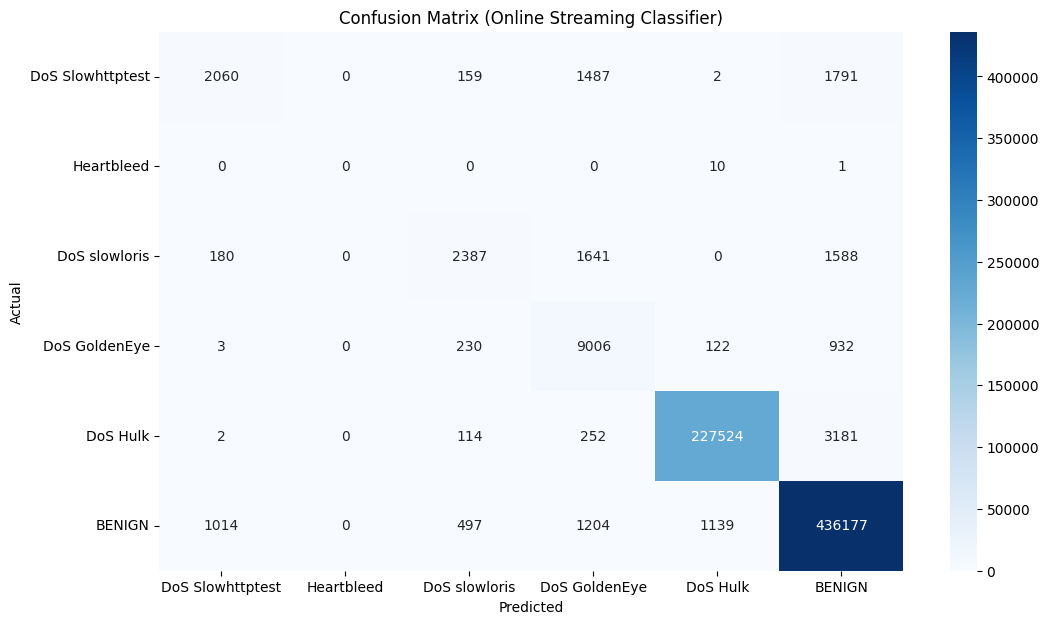

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


if len(cm.classes) == 0:
    print("Confusion matrix is empty — no predictions made yet.")
else:

    labels = list(cm.classes)


    cm_matrix = pd.DataFrame(0, index=labels, columns=labels)


    for true_label, preds in cm.data.items():
        for pred_label, count in preds.items():
            cm_matrix.loc[true_label, pred_label] = count


    plt.figure(figsize=(12,7))
    sns.heatmap(cm_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix (Online Streaming Classifier)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
import pandas as pd


labels = list(cm.classes)


cm_raw = pd.DataFrame(0, index=labels, columns=labels)


for true_label, preds in cm.data.items():
    for pred_label, count in preds.items():
        cm_raw.loc[true_label, pred_label] = count

print("Raw Confusion Matrix:")
cm_raw


Raw Confusion Matrix:


,DoS Slowhttptest,Heartbleed,DoS slowloris,DoS GoldenEye,DoS Hulk,BENIGN
DoS Slowhttptest,2060,0,159,1487,2,1791
Heartbleed,0,0,0,0,10,1
DoS slowloris,180,0,2387,1641,0,1588
DoS GoldenEye,3,0,230,9006,122,932
DoS Hulk,2,0,114,252,227524,3181
BENIGN,1014,0,497,1204,1139,436177


In [ ]:
cm_percent = cm_raw.div(cm_raw.sum(axis=1), axis=0) * 100
cm_percent = cm_percent.round(2)   #


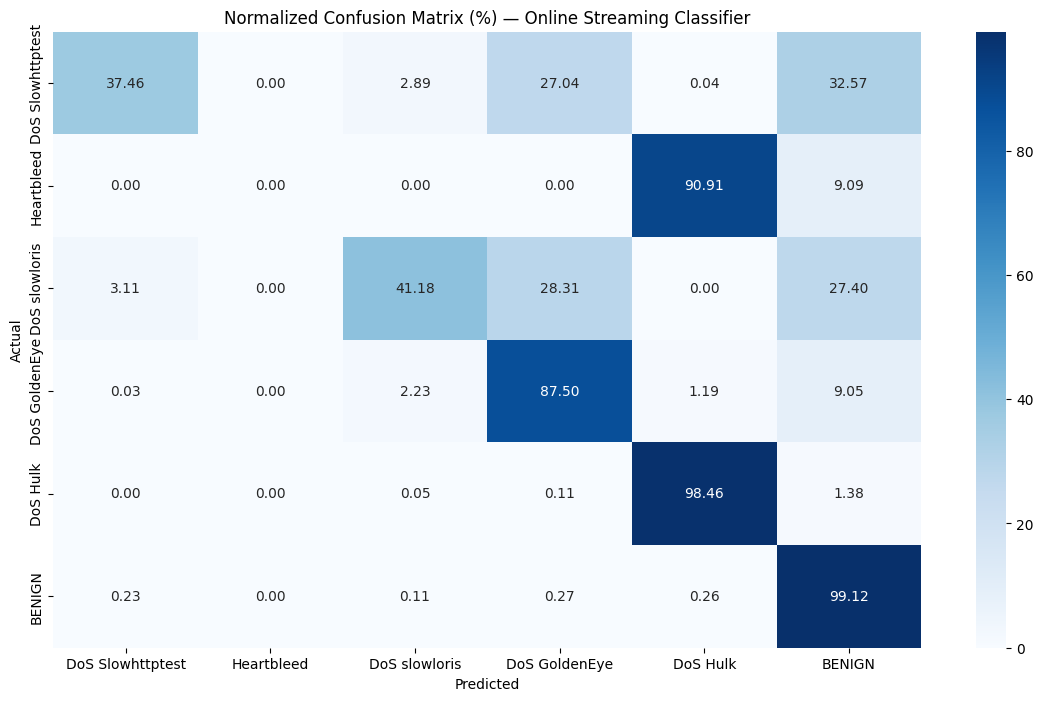

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues")
plt.title("Normalized Confusion Matrix (%) — Online Streaming Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from collections import Counter

labels_seen = []

for i, (_, row) in enumerate(df_wed.iterrows()):
    yi = row[LABEL_COL]
    labels_seen.append(yi)


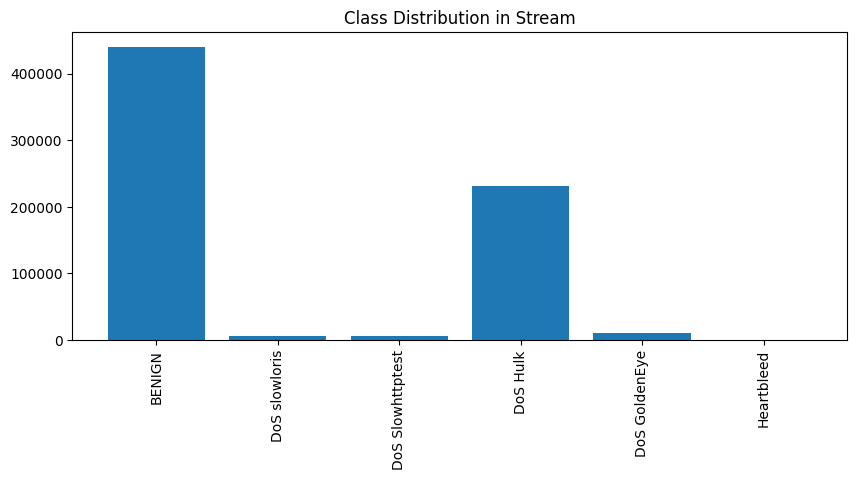

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

counts = Counter(labels_seen)

plt.figure(figsize=(10,4))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=90)
plt.title("Class Distribution in Stream")
plt.show()


***TI generation pipeline:***

In [ ]:
events_list = []

for i, row in df_wed.iterrows():

    x = row[feature_cols].to_dict()
    y = row[LABEL_COL]              # true label

    pred = model.predict_one(x)     # predicted label


    if y != "BENIGN":
        events_list.append({
            "index": i,
            "true_label": y,
            "predicted_label": pred,
            "features": x
        })


    model.learn_one(x, y)



In [ ]:
import random

sample_events = random.sample(events_list, 3)


In [ ]:
import json

def build_event_json(event):
    return json.dumps({
        "event_id": event["index"],
        "true_label": event["true_label"],
        "predicted_label": event["predicted_label"],
        "features": event["features"]
    }, indent=2)


In [ ]:
TI_PROMPT = """
You are a Cyber Threat Intelligence (CTI) analyst.
Your task is to analyze the following network flow record and generate
a structured, concise, and strictly evidence-based TI report.

=====================
EVENT DATA (JSON)
=====================
{event_json}

=====================
STRICT ANALYSIS RULES
=====================
1. You may ONLY use the fields explicitly present in the event JSON:
   - Flow ID, Timestamp, Protocol
   - Source IP, Source Port
   - Destination IP, Destination Port
   - Flow Duration, Flow Bytes/s, Flow Packets/s
   - Total Fwd Packets, Total Bwd Packets
   - Total Length of Fwd Packets, Total Length of Bwd Packets
   - Fwd/Bwd Packet Length (Max/Min/Mean/Std)
   - Packet Length (Min/Max/Mean/Std/Variance)
   - Flow IAT (Mean/Std/Min/Max)
   - Fwd/Bwd IAT (Total/Mean/Std/Min/Max)
   - All flag fields (SYN, ACK, PSH, URG, FIN, CWE, ECE, etc.)
   - Window metrics, segment size, subflow statistics
   - Active/Idle metrics
   - The "Label" field (attack type or BENIGN)

2. STRICTLY FORBIDDEN:
   - No assumptions, no speculation, no inferred behavior.
   - No new IPs, ports, domains, URLs, hostnames.
   - No payload descriptions.
   - No CVE, malware, tool names, campaign names.
   - No attribution of any kind (country, actor, intent).
   - No invented IoCs.

3. If the label indicates BENIGN, output:
   "Based on the available data, this event does not indicate malicious activity."

4. TI report MUST follow this exact structure (no additions):
   1. Executive Summary (state only what the numeric evidence directly shows)
   2. Threat Classification
      - Label: {Label_from_JSON}
      - Attack Definition: {One-sentence definition based strictly on flow behavior}
      - Behavioral Evidence: {Which numeric patterns support the definition}
   3. Key Indicators (only restate values found in the JSON)
   4. MITRE ATT&CK Mapping
      - Only if the traffic pattern strictly matches a documented behavioral signature.

   5. Impact Assessment
      - Only describe effects directly inferable from numeric metrics
        (e.g., "high backward packet size", "long flow duration").
   6. You must select mitigation items. Selection MUST follow these rules:
      (A) Mitigations MUST be chosen ONLY from the CIS-based mitigation pool listed below.
      (B) Selection MUST be based on BOTH: - The "Label" (attack type), and - The numerical traffic evidence present in the JSON
      (e.g., Flow Duration, packet sizes, ratios, flags, IAT values, active/idle metrics).
      (C) You MUST NOT create, reword, or modify any mitigation.
      (D) You MUST NOT output more or fewer than 5 items.
      (E) If a mitigation does not appear in the pool, you MUST NOT use it.
      ---- CIS Mitigation Pool ----
      M1. Implement network rate limiting and bandwidth throttling.
      M2. Enforce firewall filtering and network segmentation.
      M3. Enable intrusion detection/prevention (IDS/IPS).
      M4. Apply anomaly-based detection on flow metrics.
      M5. Maintain secure configurations for network services.
      M6. Limit exposure of services through access control.
      M7. Collect and review detailed network logs.
      M8. Monitor directional traffic volume and byte ratios.
      M9. Enforce resource consumption thresholds per connection.
      M10. Use WAF (Web Application Firewall) for HTTP-based flows.
      M11. Apply DoS/DDoS protection and traffic scrubbing.
      M12. Monitor long-duration or high-packet-rate flows.
      M13. Detect abnormal packet-size distributions.
      M14. Limit repeated connections from a single source.
      M15. Inspect flow timing irregularities.



5. ZERO hallucination. ZERO extrapolation. ZERO speculation.

6. Maintain logging and visibility on directional byte ratios.

=====================
OUTPUT FORMAT
=====================
TI Report:
"""


In [ ]:
from openai import OpenAI
client = OpenAI(api_key="YOUR_OPENAI_API_KEY")

def generate_ti_report(event):
    event_json = build_event_json(event)
    prompt = TI_PROMPT.format(event_json=event_json)

    response = client.chat.completions.create(
        model="gpt-4.1-mini",
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message["content"]


Test:

In [ ]:
pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.7 MB/s eta 0:00:00


In [ ]:
import PyPDF2

def read_pdf(path):
    reader = PyPDF2.PdfReader(path)
    text = ""
    for page in reader.pages:
        extracted = page.extract_text()
        if extracted:
            text += extracted + "\n"
    return text

doc1 = read_pdf("/content/drive/MyDrive/Final Report-1.pdf")
doc2 = read_pdf("/content/drive/MyDrive/Final-Report-2.pdf")

print(doc1[:500])
print(doc2[:500])


TI Report:  
1. Executive Summary  
The flow shows very high flow duration (5,007,321 µs) , large backward packet sizes  (Bwd 
Packet Length Max = 5792), and high variance in packet length (3,245,259.267) . The flow also 
exhibits extreme IAT values  (Flow IAT Max = 1,387,273.385 µs) and high backward bytes 
(11,632)  relative to limited forward activity. These numerical patterns indicate abnormal traffic 
volume and timing characteristics . 
 
2. Threat Classification  
Label:  DoS GoldenEye  

TI Report  
1. Executive Summary  
The flow shows very long duration (5,007,321 µs) , high backward packet sizes , large 
backward segment sizes , and irregular timing patterns . The traffic maintains low forward 
packet count (8 packets)  but high backward byte volume (11,632 bytes) . These numeric 
patterns indicate resource -intensive, abnormal request -response interactions . 
 
2. Threat Classification  
Label:  
DoS GoldenEye  
Attack Definition (based strictly on flow behavior):  
A DoS 

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

emb1 = model.encode(doc1, convert_to_tensor=True)
emb2 = model.encode(doc2, convert_to_tensor=True)

similarity = util.cos_sim(emb1, emb2).item()
print("Semantic similarity:", similarity)


Semantic similarity: 0.940047025680542


In [ ]:
import PyPDF2

def read_pdf(path):
    reader = PyPDF2.PdfReader(path)
    text = ""
    for page in reader.pages:
        extracted = page.extract_text()
        if extracted:
            text += extracted + "\n"
    return text

doc1 = read_pdf("/content/drive/MyDrive/without-prompt.pdf")
doc2 = read_pdf("/content/drive/MyDrive/TI-Report-Without Prompt-2.pdf")

print(doc1[:500])
print(doc2[:500])

Advanced Cyber Threat Intelligence Report
1. Executive Summary
This network flow record exhibits strong behavioral indicators of a high-intensity application-layer
Denial-of-Service attack. The asymmetric byte distribution, extremely large backward payload
segments, and prolonged flow duration strongly suggest that the destination host was under stress
from abnormal HTTP request patterns designed to exhaust server resources.
2. Detailed Behavioral Assessment
2.1 Packet Size & Payload Anomalies
-
       Cyber Threat Intelligence Report  
Event Type:  DoS Attack – GoldenEye  
Flow ID:  172.16.0.1 -192.168.10.50 -58962 -80-6 
Source → Destination:  172.16.0.1:58962 → 192.168.10.50:80  
Timestamp:  2017 -07-05 11:10  
 
1. Executive Summary  
The analyzed network flow exhibits strong indicators of a GoldenEye DoS attack , a well -known 
HTTP -based Denial -of-Service technique designed to overload web servers through slow, 
incomplete, or deliberately fragmented HTTP requests.  
The behavi

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

emb1 = model.encode(doc1, convert_to_tensor=True)
emb2 = model.encode(doc2, convert_to_tensor=True)

similarity = util.cos_sim(emb1, emb2).item()
print("Semantic similarity:", similarity)

Semantic similarity: 0.7535587549209595
